In [18]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import sys
sys.path
sys.path.append("../../models/classification")

from models import ResNet, AlexNet
from dataset import Dataset

In [6]:
TRAIN_PATH = "../../../honours_project_data/main/train_high.txt"
VAL_PATH = "../../../honours_project_data/main/test_high.txt"

train_data = Dataset(TRAIN_PATH, res=(120, 160))
val_data = Dataset(VAL_PATH, res=(120, 160))
X, y = val_data.get_all()

In [13]:
VIS_WEIGHTS_PATH = "../../../out/new_out/ResNet/ResNet_rgb_weights.h5"
LWIR_WEIGHTS_PATH = "../../../out/new_out/ResNet/ResNet_lwir_weights.h5"

model_rgb = ResNet("rgb", train_data.num_classes(), train_data.shape()).get_model()
model_lwir = ResNet("lwir", train_data.num_classes(), train_data.shape()).get_model()

model_rgb.load_weights(VIS_WEIGHTS_PATH)
model_lwir.load_weights(LWIR_WEIGHTS_PATH)

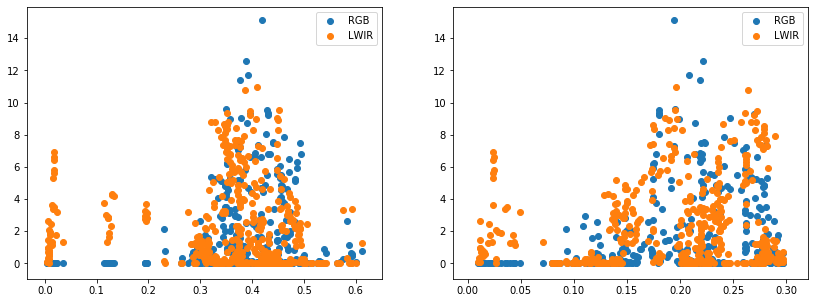

In [26]:
factor = 20

preds_rgb = model_rgb.predict(X)
preds_lwir = model_lwir.predict(X)

scores = []
for img, label, rgb, lwir in zip(X, y, preds_rgb, preds_lwir):
    mean = np.mean(img[..., :3])
    std = np.std(img[..., :3])
    loss_rgb = categorical_crossentropy(label, rgb)
    loss_lwir = categorical_crossentropy(label, lwir)
    scores.append((mean, std, loss_rgb, loss_lwir))

scores = pd.DataFrame(np.array(scores), columns=["mean", "std", "rgb", "lwir"])
# scores["mean"] = (scores["mean"] * factor).astype(int) / factor
# scores["std"] = (scores["std"] * factor).astype(int) / factor
scores_mean = scores.groupby("mean").mean()
scores_std = scores.groupby("std").mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(scores_mean.index, scores_mean.rgb, label="RGB")
ax[0].plot(scores_mean.index, scores_mean.lwir, label="LWIR")
ax[0].legend()
ax[1].plot(scores_std.index, scores_std.rgb, label="RGB")
ax[1].plot(scores_std.index, scores_std.lwir, label="LWIR")
ax[1].legend()

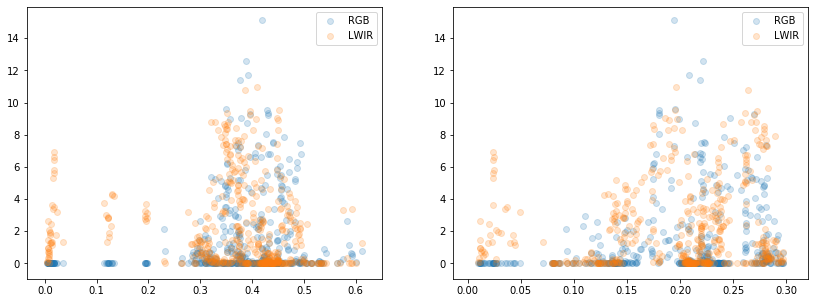

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(scores_mean.index, scores_mean.rgb, label="RGB", alpha=0.2)
ax[0].scatter(scores_mean.index, scores_mean.lwir, label="LWIR", alpha=0.2)
ax[0].legend()
ax[1].scatter(scores_std.index, scores_std.rgb, label="RGB", alpha=0.2)
ax[1].scatter(scores_std.index, scores_std.lwir, label="LWIR", alpha=0.2)
ax[1].legend()